                                                                           »
q_0: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_1: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_2: ───────────────────────────────────────────────■──────────────────────»
                                                    │                      »
q_3: ─────────────────────────────■─────────────────┼─────────■────────────»
                                  │                 │         │       ┌───┐»
q_4: ───────────────■─────────────┼────────■────────┼─────────┼───────┤ H ├»
                    │       ┌───┐ │        │P(π/2)  │         │P(π/4) └───┘»
q_5: ──────■────────┼───────┤ H ├─┼────────■────────┼─────────■────────────»
     ┌───┐ │P(π/2)  │P(π/4) └───┘ │P(π/8)           │P(π/16)               »

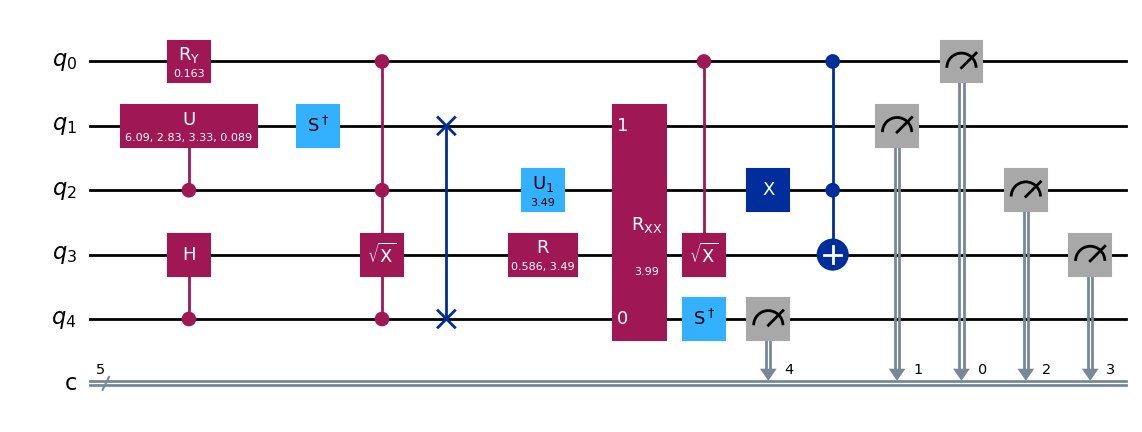

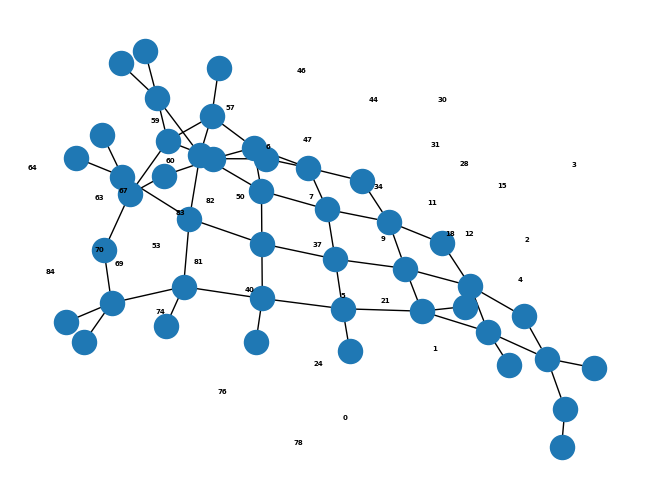

In [ ]:
import networkx as nx 
import numpy as np
import qiskit as qk 
from qiskit.circuit.random import random_circuit





######### Circuit d'exemple ###########################################
#######################################################################

def build_qft(n):
   circuit = QuantumCircuit(n)
   for j in reversed(range(n)):
       circuit.h(j)
       for k in reversed(range(j)):
           circuit.cp(np.pi * 2. ** (k - j), j, k)

   for j in range(n // 2):
       circuit.swap(j, n - j - 1)

   return circuit

qft = build_qft(7)


#print(operations)

print(qft)


#######################################################################
#######################################################################


def instruction_list(circuit):
    operations = circuit.data
    liste_instructions = []
    for instruction in operations:
        operation = instruction.operation  # Access the operation part of the CircuitInstruction
        gate_name = operation.name  # Get the gate name
        params = operation.params  # Get the parameters for the operation (if any)
        qubits = instruction.qubits 
        liste_instructions.append( (gate_name, params, qubits))
    return(liste_instructions)
        
        # Print or store the relevant details
        ##print(f"Gate Name: {gate_name}")
        #print(f"qubits: {qubits}")
        #if params:
        #    print(f"Parameters: {params}")
        #else:
        #    print("No parameters")

        ##if gate_name == 'h':

print(instruction_list(qft))

for instruction in instruction_list(qft):
    qubits = instruction[2]
    for qubit in qubits: 
        print(str(qubit)[-2])


        
          
def build_graph(circuit):
    num_qubits = circuit.num_qubits
    graph = nx.MultiGraph()
    map = dict()
    graph.add_nodes_from([i for i in range(num_qubits)])
    lignes = [ [i] for i in range(num_qubits)]
    for i in range(num_qubits):
        map[i] = 'begin'


    
    cnt = num_qubits
    def apply_tensor(name, order, qubit_indices, parameters):
        if order == 1:
            if map[lignes[qubit_indices[0]][-1]] == 'end':
                map[lignes[qubit_indices[0]][-1]] == name 
            else: 
                graph.add_node(cnt)
                graph.add_edge(lignes[qubit_indices[0]][-1], cnt)
                map[cnt] = name
                lignes[qubit_indices[0]].append(cnt)
                cnt += 1 
                
            graph.add_node(cnt)
            graph.add_edge(lignes[qubit_indices[0]][-1], cnt)
            map[cnt] = 'end'
            lignes[qubit_indices[0]].append(cnt)
            cnt += 1 
        

        


            
    

    for instruction in instruction_list(circuit):
        qubits = instruction[2]
        qubit_indices = [int(str(qbit)[-2]) for qbit in qubits]
        name = instruction[0]


        ###########tenseurs d'ordre 2########### 
        if name == 'h': 
            if map[lignes[qubit_indices[0]][-1]] == 'end':
                map[lignes[qubit_indices[0]][-1]] == name 
            else: 
                graph.add_node(cnt)
                graph.add_edge(lignes[qubit_indices[0]][-1], cnt)
                map[cnt] = name
                lignes[qubit_indices[0]].append(cnt)
                cnt += 1 
                
            graph.add_node(cnt)
            graph.add_edge(lignes[qubit_indices[0]][-1], cnt)
            map[cnt] = 'end'
            lignes[qubit_indices[0]].append(cnt)
            cnt += 1 
        ########################################
        ###########tenseurs d'ordre 4###########
        if name == 'cp' or name == 'swap':
            for index in qubit_indices:
                graph.add_node(cnt)
                if map[lignes[index][-1]] == 'end':
                    graph.remove_node(lignes[index][-1])
                    lignes[index].pop()
                graph.add_edge(lignes[index][-1], cnt)
    
            graph.add_nodes_from([cnt+1,cnt+2])
            graph.add_edges_from([(cnt,cnt+1), (cnt, cnt+2)])
            map[cnt] = name 
            map[cnt +1] = 'end'
            map[cnt +2] = 'end'
            lignes[qubit_indices[0]].append(cnt)
            lignes[qubit_indices[1]].append(cnt)
            lignes[qubit_indices[0]].append(cnt+1)
            lignes[qubit_indices[1]].append(cnt+2)
            cnt += 3

    print(graph)
    nx.draw(graph)
    nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph), font_size=5, font_weight="bold", font_color="black")
    print(map)
    print(lignes)
    
        
build_graph(qft)



############### Circuit Qiskit aléatoire################################## 
from qiskit.circuit.random import random_circuit
 
circ = random_circuit(5, 5, measure=True)
circ.draw(output='mpl')
###########################################################################